# Homework 4.1 - Coding

This is the coding portion of the homework assignment for Section 4.1

In [1]:
import time
import math
from matplotlib import pyplot as plt

## Problem 4.1 

This problem is about different ways of computing the $n$-th Fibonacci number $F(n)$ for $n \in \mathbb{N}$.

For the purposes of this assignment, we assume $F(0) = F(1) = 1$, and for $n \geq 2$, $F(n) = F(n-2) + F(n-1)$.

### Naive Approach

Code up the naive top-down approach to this problem in the function `fib_naive()`. 
Your code should accept a natural number `n`, and should return the $n$th Fibonacci number $F(n)$.

In [2]:
def fib_naive(n:int) -> int:
    """Returns the nth Fibonacci number using naive recursion."""
    if n == 1 or n == 0:
        return 1

    return fib_naive(n - 1) + fib_naive(n - 2)

Here are some simple test cases. Add to them as you see fit.

In [3]:
assert fib_naive(0) == 1, "Failed Test Case 1 on input n=0"
print("Passed Test Case 1")

assert fib_naive(1) == 1, "Failed Test Case 2 on input n=1"
print("Passed Test Case 2")

assert fib_naive(4) == 5, "Failed Test Case 3 on input n=4"
print("Passed Test Case 3")

assert fib_naive(18) == 4181, "Failed Test Case 4 on input n=18"
print("Passed Test Case 4")


Passed Test Case 1
Passed Test Case 2
Passed Test Case 3
Passed Test Case 4


### Memoized Approach

Code up the memoized top-down approach to this problem in the function `fib_memoized()`.
Your code should accept a natural number `n`, and should return the $n$th Fibonacci number $F(n)$.

**Important**: Your memoizing data structure should be INSIDE the `fib_memoized()` function for the autograder to grade your work correctly. To facilitate this, create an inner/helper function `fib_memoized_helper()` which actually performs the recursion _inside_ of `fib_memoized`.

In [4]:
def fib_memoized(n:int) -> int:
    """Returns the nth Fibonacci number using memoized top-down recursion"""
    lookup = {0:1, 1:1}         # Data structure for memoization

    def fib_memoized_helper(n:int) -> int:
        if n in lookup:
            return lookup[n]
        
        sol_at_n = fib_memoized_helper(n - 1) + fib_memoized_helper(n - 2)

        lookup[n] = sol_at_n

        return sol_at_n

    

    return fib_memoized_helper(n)

Again, here are some simple test cases. Add to them as you see fit.

In [5]:
assert fib_memoized(0) == 1, "Failed Test Case 1 on input n=0"
print("Passed Test Case 1")

assert fib_memoized(1) == 1, "Failed Test Case 2 on input n=1"
print("Passed Test Case 2")

assert fib_memoized(4) == 5, "Failed Test Case 3 on input n=4"
print("Passed Test Case 3")

assert fib_naive(18) == 4181, "Failed Test Case 4 on input n=18"
print("Passed Test Case 4")

Passed Test Case 1
Passed Test Case 2
Passed Test Case 3
Passed Test Case 4


### Bottom-Up Approach

Code up the bottom-approach to this problem in the function `fib_bottom_up()`.

Your code should accept a natural number `n`, and should return the $n$th Fibonacci number $F(n)$.

In [6]:
def fib_bottom_up(n:int) -> int:
    """Returns the nth Fibonacci number using a bottom-up approach."""
    lookup = {0:1, 1:1}

    for i in range(2, n + 1):
        lookup[i] = lookup[i-1] + lookup[i-2]
        lookup.pop(i - 2)
    
    return lookup[n]
    

Again, test cases for sanity checking.

In [7]:
assert fib_bottom_up(0) == 1, "Failed Test Case 1 on input n=0"
print("Passed Test Case 1")

assert fib_bottom_up(1) == 1, "Failed Test Case 2 on input n=1"
print("Passed Test Case 2")

assert fib_bottom_up(4) == 5, "Failed Test Case 3 on input n=4"
print("Passed Test Case 3")

assert fib_naive(18) == 4181, "Failed Test Case 4 on input n=18"
print("Passed Test Case 4")

Passed Test Case 1
Passed Test Case 2
Passed Test Case 3
Passed Test Case 4


### Timing and Comparison

Time all three methods and compare their performance for the values of $n$ given in the list `n_vals`. Store the timing results in the lists `naive_times`, `memoized_times`, and `bottom_up_times`.

NOTE: This may take a minute or two to run. Be patient.

In [8]:
n_vals = range(1,36)
naive_times = []
memoized_times = []
bottom_up_times = []

for n in n_vals:
    s = time.perf_counter()
    fib_naive(n)
    e = time.perf_counter()
    naive_times.append(e - s)

    s = time.perf_counter()
    fib_memoized(n)
    e = time.perf_counter()
    memoized_times.append(e - s)

    s = time.perf_counter()
    fib_bottom_up(n)
    e = time.perf_counter()
    bottom_up_times.append(e - s)



Finally, create a `matplotlib` plot visualizing the difference in times it took for each of these three algorithms.
Use the times in the lists from the previous cell as y-values, and `n_vals` as x-values.
Plot them all on the same axis, making sure to label each line, and include a legend, axis labels, and a title.

Then, display the plot.

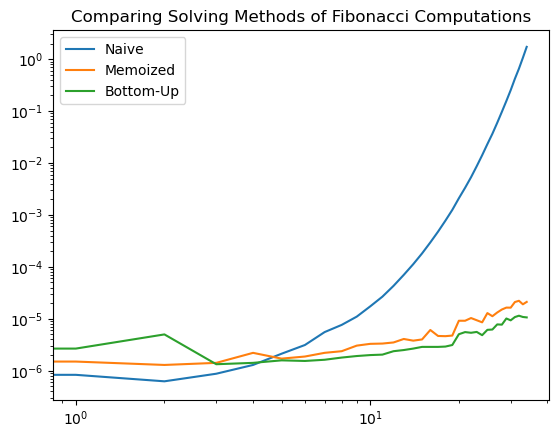

In [9]:
plt.loglog(naive_times, label="Naive")
plt.loglog(memoized_times, label="Memoized") 
plt.loglog(bottom_up_times, label="Bottom-Up")
plt.title("Comparing Solving Methods of Fibonacci Computations")
plt.legend()
plt.show()

Write a sentence or two describing what you notice about these results. (It may help if you additionally try plotting everything but the naive recursion, as well as the plot you've already made of all three methods)

**Response:** _Naive is clearly the worst, with Bottom-Up making slight improvements over Memoized._

---

## Problem 4.2 

This problem is about computing the optimal number $n(v)$ of coins in the change-making problem for $v$ cents ($v \in \mathbb{N}$) and an arbitrary coinage system $C$ (a set of coin values, in cents).

### Naive Recursion

Code up the naive top-down recursion for the change making problem inside the function `naive_coins()`.

Your code should accept as arguments a coinage system `C` (as a list of integers) and a value `v` (an integer) we'd like to make change out to.

It should return (1) the optimal number of coins to make change (an integer), and (2) a list of the coin values used (a list of integers).

In [20]:
def naive_coins(C: list[int], v: int) -> tuple[int, list[int]]:
    """Solves the change-making problem using naive top-down recursion.
    
    Args:
        C (list[int]) - A list of coin values in a given coinage system
        v (int) - The number of cents we'd like to make change to

    Returns:
        int: The least number of coins required to make change out to v cents 
        list[int]: The list of coin denonimations used to make this change
    """

    lookup = {0:(0, [])}

    def make_change(w):
        if w in lookup:
            return lookup[w]
        
        best = None
        for coin in C:
            if coin <= w:
                count, coins_list = make_change(w - coin)
                if best is None or count+1 < best[0]:
                    best = (count + 1, coins_list + [coin])
        

        lookup[w] = best
        return best

    return make_change(v)


Here are some simple sanity-check test cases. Add to them as you see fit while you build/test your code.

In [21]:
C = [1, 5, 10, 25, 50, 100]      # US Coinage system

# 1st test case
val, coins_used = naive_coins(C, 10)
assert val == 1
assert coins_used == [10]
print("Test 1 Passed")

# 2nd test case
val, coins_used = naive_coins(C, 37)
assert val == 4
assert sorted(coins_used) == [1, 1, 10, 25]
print("Test 2 Passed")

Test 1 Passed
Test 2 Passed


### Bottom-Up Approach

Code up the bottom-up approach for the change making problem inside the function `bottom_up_coins()`.

Your code should accept as arguments a coinage system `C` (as a list of integers) and a value `v` (an integer) we'd like to make change out to.

It should return (1) the optimal number of coins to make change (an integer), and (2) a list of the coin values used (a list of integers).

In [33]:
def bottom_up_coins(C: list[int], v: int) -> tuple[int, list[int]]:
    """Solves the change-making problem using bottom_up recursion.
    
    Args:
        C (list[int]) - A list of coin values in a given coinage system
        v (int) - The number of cents we'd like to make change to

    Returns:
        int: The least number of coins required to make change out to v cents 
        list[int]: The list of coin denonimations used to make this change
    """
    lookup = [(float("inf"), []) for _ in range(v + 1)]
    lookup[0] = (0, [])

    for w in range(1, v + 1):
        for coin in C:
            if coin <= w:
                prev_count, prev_coinage = lookup[w - coin]
                candidate = (prev_count + 1, prev_coinage + [coin])
                if candidate[0] < lookup[w][0]:
                    lookup[w] = candidate

    return lookup[v]




Again, here are some simple sanity-check test cases. Add to them as you see fit.

In [27]:
C = [1, 5, 10, 25, 50, 100]      # US Coinage system

# 1st test case
val, coins_used = bottom_up_coins(C, 10)
assert val == 1
assert coins_used == [10]
print("Test 1 Passed")

# 2nd test case
val, coins_used = bottom_up_coins(C, 37)
assert val == 4
assert sorted(coins_used) == [1, 1, 10, 25]
print("Test 2 Passed")

Test 1 Passed
Test 2 Passed


### Timing and Comparison

Time both methods and compare their performance on the US Coinage system for the values of $v$ given in the list `v_vals`. Store the timing results in the lists `naive_coin_times` and `bottom_up_coin_times`.

In [34]:
v_vals = range(50)
naive_coin_times = []
bottom_up_coin_times = []

for v in v_vals:
    s = time.perf_counter()
    naive_coins(C, v)
    e = time.perf_counter()
    naive_coin_times.append(e - s)

    s = time.perf_counter()
    bottom_up_coins(C, v)
    e = time.perf_counter()
    bottom_up_coin_times.append(e - s)

Finally, create a `matplotlib` plot visualizing the difference in times it took for each of these two coin algorithms.
Use the times in the lists from the previous cell as y-values, and `v_vals` as x-values.
Plot them all on the same axis, making sure to label each line, and include a legend.

Then, display the plot.

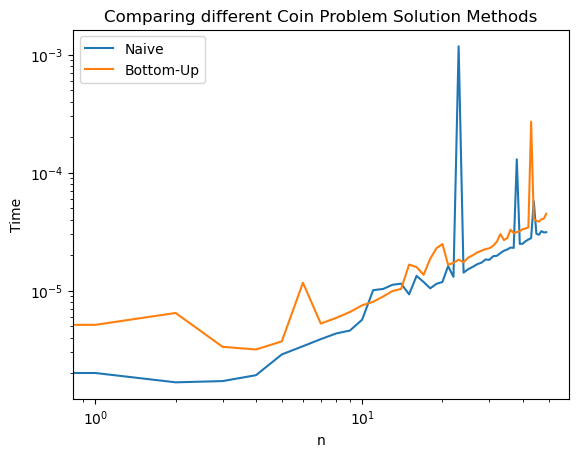

In [35]:
plt.loglog(naive_coin_times, label="Naive")
plt.loglog(bottom_up_coin_times, label="Bottom-Up")
plt.legend()
plt.xlabel("n")
plt.ylabel("Time")
plt.title("Comparing different Coin Problem Solution Methods")
plt.show()

Write a sentence or two describing what you notice about these results.

**Response:** _I see that these methods are quite similar in temporal complexity, with each spiking up at different points in no discernable fashion_

## Problem 4.3 

Code up a greedy version of the change-making problem inside the function `greedy_coins()`.

Your code should accept as arguments a coinage system `C` (as a list of integers) and a value `v` (an integer) we'd like to make change out to.

It should return (1) the optimal number of coins to make change (an integer), and (2) a list of the coin values used (a list of integers).

In [12]:
def greedy_coins(C: list[int], v: int) -> tuple[int, list[int]]:
    """Solves the change-making problem using a greedy algorithm.
    
    Args:
        C (list[int]) - A list of coin values in a given coinage system
        v (int) - The number of cents we'd like to make change to

    Returns:
        int: The least number of coins required to make change out to v cents 
        list[int]: The list of coin denonimations used to make this change
    """
    change = []
    for coin in sorted(C, reverse=True):
        while coin <= v:
            v -= coin
            change.append(coin)

    return len(change), change

Again, some more simple tets cases. You can always add more.

In [13]:
C = [1, 5, 10, 25, 50, 100]      # US Coinage system

# 1st test case
val, coins_used = greedy_coins(C, 10)
assert val == 1
assert coins_used == [10]
print("Test 1 Passed")

# 2nd test case
val, coins_used = greedy_coins(C, 37)
assert val == 4
assert sorted(coins_used) == [1, 1, 10, 25]
print("Test 2 Passed")

Test 1 Passed
Test 2 Passed


Verify that the greedy solution is the same as the optimal solution for all values $v \in \{1, 2, \ldots, 1999\}$ by comparing the output of the greedy algorithm in `greedy_coins()` to the output of the optimal algorithm in `bottom_up_coins()`.

This can be done by running the cell below. 

If any `AssertionError` is raised, the output is not consistent. If no errors are raised, you're all set!

In [36]:
C = [1, 5, 10, 25, 50, 100]      # US Coinage system
for v in range(1, 2000):
    greedy_num, greedy_coins_used = greedy_coins(C, v)
    optimal_num, optimal_coins_used = bottom_up_coins(C, v)
    assert greedy_num == optimal_num, f"Greedy and optimal number of coins used are different on v = {v}"
    assert sorted(greedy_coins_used) == sorted(optimal_coins_used), f"Greedy and optimal coins used are different on v = {v}"

print("All tests passed - greedy and optimal solutions are the same for v=1,2,...,1999")

All tests passed - greedy and optimal solutions are the same for v=1,2,...,1999


Time your code for the greedy solution on the values from earlier in `v_vals`, and store the results in the list `greedy_coin_times`.

In [40]:
greedy_coin_times = []
for v in v_vals:
    s = time.perf_counter()
    greedy_coins(C, v)
    e = time.perf_counter()
    greedy_coin_times.append(e-s)


Finally, to compare your results with the bottom-up method from Problem 4.2, plot the two algorithm times versus `v_vals` on the same axis, using a similar format to the previous two plots you've completed in this assignments. Display the plot.

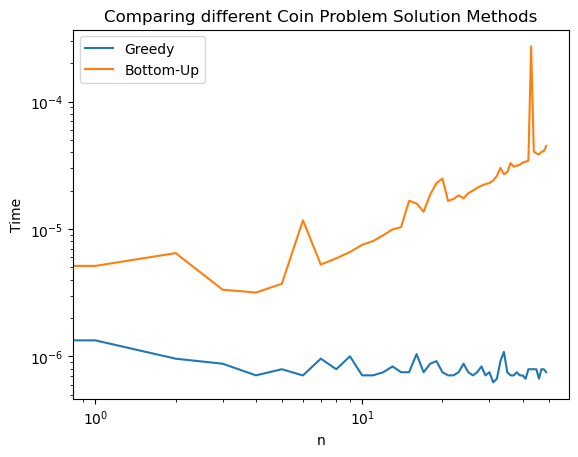

In [41]:
plt.loglog(greedy_coin_times, label="Greedy")
plt.loglog(bottom_up_coin_times, label="Bottom-Up")
plt.legend()
plt.xlabel("n")
plt.ylabel("Time")
plt.title("Comparing different Coin Problem Solution Methods")
plt.show()

Write a sentence or two describing what you notice about these results.

**Response:** _Greedy is significantly faster than Bottom-Up._

---

IMPORTANT: Please "Restart and Run All" and ensure there are no errors. Then, submit this .ipynb file to Gradescope.